In [ ]:
!pip install qiskit

     |████████████████████████████████| 6.0MB 2.1MB/s 
     |████████████████████████████████| 18.0MB 206kB/s 
     |████████████████████████████████| 235kB 52.5MB/s 
     |████████████████████████████████| 215kB 56.6MB/s 
     |████████████████████████████████| 2.1MB 55.2MB/s 
     |████████████████████████████████| 1.0MB 45.7MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 194kB 49.1MB/s 
     |████████████████████████████████| 112kB 56.1MB/s 
     |████████████████████████████████| 614kB 43.8MB/s 
     |████████████████████████████████| 3.2MB 31.7MB/s 
     |████████████████████████████████| 6.3MB 33.2MB/s 
  Created wheel for qiskit: filename=qiskit-0.26.2-cp37-none-any.whl size=10491 sha256=627616c3ad13b3dc6a16b86e4939aacf06d86eacaa2dfcd9db5117cf106ca404
  Stored in directory: /root/.cache/pip/wheels/89/89/34/524839952d5a58a7be9789e580bfc1ca883bf6579152444568
  Created wheel for python-constraint: filename=python_constraint-1.4.0-

In [ ]:
from qiskit.providers.aer import QasmSimulator  
from qiskit.providers.aer import AerSimulator
from qiskit.circuit.library import TwoLocal
from qiskit.algorithms import VQE
from qiskit.algorithms.optimizers import COBYLA 
from qiskit.circuit.library import EfficientSU2
from qiskit.aqua import set_qiskit_aqua_logging, QuantumInstance
# opflow is Qiskit's module for creating operators like yours
from qiskit import *
from qiskit.opflow import OperatorBase
from qiskit.opflow import Z, X, I  # Pauli Z, X matrices and identity
import pylab
import matplotlib.pyplot as plt
import numpy as np
from qiskit.visualization import plot_histogram

In [ ]:
def get_interaction(element_1, element_2, matrix_dimension):
    output = []
    (tR, tC) = matrix_dimension
    (R1, C1) = element_1
    (R2, C2) = element_2
    if (-1 in element_1) or (-1 in element_2) or (tR in [R1, R2]) or (tC in [C1, C2]):
        # Return empty, for outside bounds in edge cases  
        return ""
    '''
    element_1 : [1, 0]
    element_2 : [2, 0]
    matrix_dimension : 3, 3

    output : III ZII ZII

    III
    ZII
    ZII


    '''
    for _ in range(tR):
        R = []
        for _ in range(tC):
            R += [ "I" ]
        output += [R]
    R,C = element_1
    output[R][C] = "Z"
    R,C = element_2
    output[R][C] = "Z" 
    output = "^".join([ "^".join([ R for R in C ]) for C in output ])
    return f"({output})"

# print(get_interaction((0, 1), (1, 1), (3,3)))

def HamiltonianInteraction(matrix_dimension = None):
    if not matrix_dimension:
        matrix_dimension = (lattice_length , lattice_length)
    (tR, tC) = matrix_dimension
    output = ""
    for R in range(tR):
        for C in range(tC):
            Oi = (R, C)
            Li = (R-1, C)
            Ri = (R+1, C)
            Ti = (R, C-1)
            Bi = (R, C+1)
            I = []
            I += [get_interaction(Li, Oi, matrix_dimension)]
            I += [get_interaction(Ri, Oi, matrix_dimension)]
            I += [get_interaction(Ti, Oi, matrix_dimension)]
            I += [get_interaction(Bi, Oi, matrix_dimension)]
            I = "+".join(I)
            # print(I)
            output += I + "+"
    return output.replace("++", "+").replace("++", "+").strip('+')
            



In [ ]:
print(HamiltonianInteraction((6,6)))

(Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I

In [ ]:
# H = J * (Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z)
# - B_z * (( Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z )
# ) - B_x * ( ( X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ))

# Anti-Ferromagnetic

In [ ]:
# J = 1
# B_x = 0.
# B_z = 0.

In [ ]:
# Hamiltonian = J * (Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z)
# - B_z * (( Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z )
# ) - B_x * ( ( X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ))

# ansatz = TwoLocal(num_qubits=36, rotation_blocks=['ry', 'rz'], entanglement_blocks=None, entanglement='full', reps=1, skip_unentangled_qubits=False, skip_final_rotation_layer=True)
# print(ansatz)
# backend = AerSimulator(method='matrix_product_state')
# quantum_instance = QuantumInstance(backend,
#                                    shots = 8192,
#                                    initial_layout = None,
#                                    optimization_level = 3)  

# optimizer = COBYLA(maxiter=10000, tol=0.000000001)   
# vqe = VQE(Hamiltonian, ansatz, optimizer, include_custom = False)
# print('We are using:', quantum_instance.backend)
# vqe_result = vqe.run(quantum_instance)
# print(vqe['result'])
# plot_histogram(vqe_result['eigenstate'])

In [ ]:
# J = 1
# B_x = 0.5
# B_z = 1.0

In [ ]:
# Hamiltonian = J * (Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z)
# - B_z * (( Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z )
# ) - B_x * ( ( X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ))

# ansatz = TwoLocal(num_qubits=36, rotation_blocks=['ry', 'rz'], entanglement_blocks=None, entanglement='full', reps=1, skip_unentangled_qubits=False, skip_final_rotation_layer=True)
# print(ansatz)
# backend = AerSimulator(method='matrix_product_state')
# quantum_instance = QuantumInstance(backend,
#                                    shots = 8192,
#                                    initial_layout = None,
#                                    optimization_level = 3)  

# optimizer = COBYLA(maxiter=10000, tol=0.000000001)   
# vqe = VQE(Hamiltonian, ansatz, optimizer, include_custom = False)
# print('We are using:', quantum_instance.backend)
# vqe_result = vqe.run(quantum_instance)
# print(vqe['result'])
# plot_histogram(vqe_result['eigenstate'])

In [ ]:
# J = 1
# B_x = 0.25
# B_z = 1.5

In [ ]:
# Hamiltonian = J * (Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z)
# - B_z * (( Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z )
# ) - B_x * ( ( X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ))

# ansatz = TwoLocal(num_qubits=36, rotation_blocks=['ry', 'rz'], entanglement_blocks=None, entanglement='full', reps=1, skip_unentangled_qubits=False, skip_final_rotation_layer=True)
# print(ansatz)
# backend = AerSimulator(method='matrix_product_state')
# quantum_instance = QuantumInstance(backend,
#                                    shots = 8192,
#                                    initial_layout = None,
#                                    optimization_level = 3)  

# optimizer = COBYLA(maxiter=10000, tol=0.000000001)   
# vqe = VQE(Hamiltonian, ansatz, optimizer, include_custom = False)
# print('We are using:', quantum_instance.backend)
# vqe_result = vqe.run(quantum_instance)
# print(vqe['result'])
# plot_histogram(vqe_result['eigenstate'])

# Disordered

In [ ]:
J = 1
B_x = 2.0
B_z = 0.0

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/operators/operator_base.py:46: DeprecationWarning: The package qiskit.aqua.operators is deprecated. It was moved/refactored to qiskit.opflow (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  warn_package('aqua.operators', 'qiskit.opflow', 'qiskit-terra')


       ┌──────────┐┌───────────┐
 q_0: ─┤ RY(θ[0]) ├┤ RZ(θ[36]) ├
       ├──────────┤├───────────┤
 q_1: ─┤ RY(θ[1]) ├┤ RZ(θ[37]) ├
       ├──────────┤├───────────┤
 q_2: ─┤ RY(θ[2]) ├┤ RZ(θ[38]) ├
       ├──────────┤├───────────┤
 q_3: ─┤ RY(θ[3]) ├┤ RZ(θ[39]) ├
       ├──────────┤├───────────┤
 q_4: ─┤ RY(θ[4]) ├┤ RZ(θ[40]) ├
       ├──────────┤├───────────┤
 q_5: ─┤ RY(θ[5]) ├┤ RZ(θ[41]) ├
       ├──────────┤├───────────┤
 q_6: ─┤ RY(θ[6]) ├┤ RZ(θ[42]) ├
       ├──────────┤├───────────┤
 q_7: ─┤ RY(θ[7]) ├┤ RZ(θ[43]) ├
       ├──────────┤├───────────┤
 q_8: ─┤ RY(θ[8]) ├┤ RZ(θ[44]) ├
       ├──────────┤├───────────┤
 q_9: ─┤ RY(θ[9]) ├┤ RZ(θ[45]) ├
      ┌┴──────────┤├───────────┤
q_10: ┤ RY(θ[10]) ├┤ RZ(θ[46]) ├
      ├───────────┤├───────────┤
q_11: ┤ RY(θ[11]) ├┤ RZ(θ[47]) ├
      ├───────────┤├───────────┤
q_12: ┤ RY(θ[12]) ├┤ RZ(θ[48]) ├
      ├───────────┤├───────────┤
q_13: ┤ RY(θ[13]) ├┤ RZ(θ[49]) ├
      ├───────────┤├───────────┤
q_14: ┤ RY(θ[14]) ├┤ RZ(θ[50]) ├
      ├───

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/quantum_instance.py:137: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  'qiskit-terra')
/usr/local/lib/python3.7/dist-packages/qiskit/aqua/algorithms/vq_algorithm.py:72: DeprecationWarning: The class qiskit.aqua.algorithms.VQAlgorithm is deprecated. It was moved/refactored to qiskit.algorithms.VariationalAlgorithm (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/master/README.md#migration-guide>
  'qiskit-terra')
/usr/local/lib/python3.7/dist-packages/qiskit/aqua/algorithms/quantum_algorithm.py:46: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information se

We are using: aer_simulator_matrix_product_state


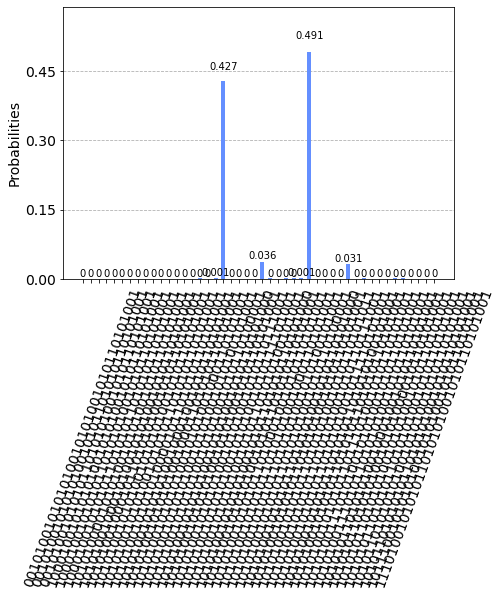

In [ ]:
import numpy as np
from qiskit.providers.aer import AerSimulator, QasmSimulator
from qiskit.algorithms.optimizers import COBYLA 
from qiskit.circuit.library import TwoLocal
from qiskit.aqua.operators import *
from qiskit.aqua import set_qiskit_aqua_logging, QuantumInstance
from qiskit.aqua.algorithms import NumPyMinimumEigensolver, VQE, NumPyEigensolver
from qiskit.circuit import QuantumCircuit, ParameterVector

# pauli_terms = ['IIIIIIIZ', 'IIIIIIZI', 'IIIIIZII' ]
# pauli_weights = [504.0, 1008.0, 2016.0]
# pauli_dict = {'paulis': [{"coeff": {"imag": 0., "real": pauli_weights[i] }, "label": pauli_terms[i]} \
#                          for i in range(len(pauli_terms))]}


Hamiltonian = J * (Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z)
- B_z * (( Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z )
) - B_x * ( ( X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ))

ansatz = TwoLocal(num_qubits=36, rotation_blocks=['ry', 'rz'], entanglement_blocks=None, entanglement='full', reps=1, skip_unentangled_qubits=False, skip_final_rotation_layer=True)
print(ansatz)
backend = AerSimulator(method="matrix_product_state")
quantum_instance = QuantumInstance(backend,
                                   shots = 8192,
                                   initial_layout = None,
                                   optimization_level = 3)  

optimizer = COBYLA(tol=0.000000001)   
vqe = VQE(Hamiltonian, ansatz, optimizer, initial_point= None , include_custom = False)
print('We are using:', quantum_instance.backend)
vqe_result = vqe.run(quantum_instance)
vqe_result['eigenstate']
plot_histogram(vqe_result['eigenstate'])

In [ ]:
# J = 1
# B_x = 2.0
# B_z = 1.0

In [ ]:
# Hamiltonian = J * (Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z)
# - B_z * (( Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z )
# ) - B_x * ( ( X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ))

# ansatz = TwoLocal(num_qubits=36, rotation_blocks=['ry', 'rz'], entanglement_blocks=None, entanglement='full', reps=1, skip_unentangled_qubits=False, skip_final_rotation_layer=True)
# print(ansatz)
# backend = AerSimulator(method='matrix_product_state')
# quantum_instance = QuantumInstance(backend,
#                                    shots = 8192,
#                                    initial_layout = None,
#                                    optimization_level = 3)  

# optimizer = COBYLA(maxiter=10000, tol=0.000000001)   
# vqe = VQE(Hamiltonian, ansatz, optimizer, include_custom = False)
# print('We are using:', quantum_instance.backend)
# vqe_result = vqe.run(quantum_instance)
# print(vqe['result'])
# plot_histogram(vqe_result['eigenstate'])

In [ ]:
# J = 1
# B_x = 1.5
# B_z = 1.5

In [ ]:
# Hamiltonian = J * (Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z^I)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^I^I^I^I^I^Z)+(I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^I^Z^Z)
# - B_z * (( Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z ^ I ) + ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ Z )
# ) - B_x * ( ( X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ^ I ) +  ( I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ I ^ X ))

# ansatz = TwoLocal(num_qubits=36, rotation_blocks=['ry', 'rz'], entanglement_blocks=None, entanglement='full', reps=1, skip_unentangled_qubits=False, skip_final_rotation_layer=True)
# print(ansatz)
# backend = AerSimulator(method='matrix_product_state')
# quantum_instance = QuantumInstance(backend,
#                                    shots = 8192,
#                                    initial_layout = None,
#                                    optimization_level = 3)  

# optimizer = COBYLA(maxiter=10000, tol=0.000000001)   
# vqe = VQE(Hamiltonian, ansatz, optimizer, include_custom = False)
# print('We are using:', quantum_instance.backend)
# vqe_result = vqe.run(quantum_instance)
# print(vqe['result'])
# plot_histogram(vqe_result['eigenstate'])